In [2]:
import numpy as np
import pyrealsense2 as rs
import cv2

# Set up the pipeline and configure it
pipeline = rs.pipeline()
config = rs.config()

# Enable both the depth and color streams
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 1280, 720, rs.format.rgb8, 30)

# Start streaming with the configuration
profile = pipeline.start(config)

# Get the depth sensor's depth scale
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()

print("Depth Scale is: ", depth_scale)
# Create an align object to align depth frames to color frames
align = rs.align(rs.stream.color)
try:
    # Get frames from the camera (you might want to loop this section depending on your use-case)
    frames = pipeline.wait_for_frames()

    # Align the depth frame to the color frame
    aligned_frames = align.process(frames)
    aligned_depth_frame = aligned_frames.get_depth_frame()
    color_frame = aligned_frames.get_color_frame()

    # Check if both frames are available
    if not aligned_depth_frame or not color_frame:
        print("Frames not available!")
        exit(0)

    # Convert frames to numpy arrays for further processing
    depth_image = np.asanyarray(aligned_depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())

    # Get intrinsics for both streams
    intrinsics = aligned_depth_frame.profile.as_video_stream_profile().intrinsics

    # Save intrinsics as .npy files
    
    # intrinsics_dict = intrinsics_to_dict(intrinsics)
    # print(intrinsics_dict)
    # Save the dictionaries
    cv2.imwrite('color1.png', cv2.cvtColor(color_image, cv2.COLOR_RGB2BGR))  # Convert RGB to BGR for OpenCV
    cv2.imwrite('depth1.png', depth_image.astype(np.uint16))  # Save depth as 16-bit PNG

finally:
    # Stop the streaming
    pipeline.stop()

intrinsic_matrix = [
    [intrinsics.fx, 0, intrinsics.ppx],
    [0, intrinsics.fy, intrinsics.ppy],
    [0, 0, 1]
]

# Save the matrix using numpyp
np.save('intrinsics.npy', intrinsic_matrix)



Depth Scale is:  0.0002500000118743628


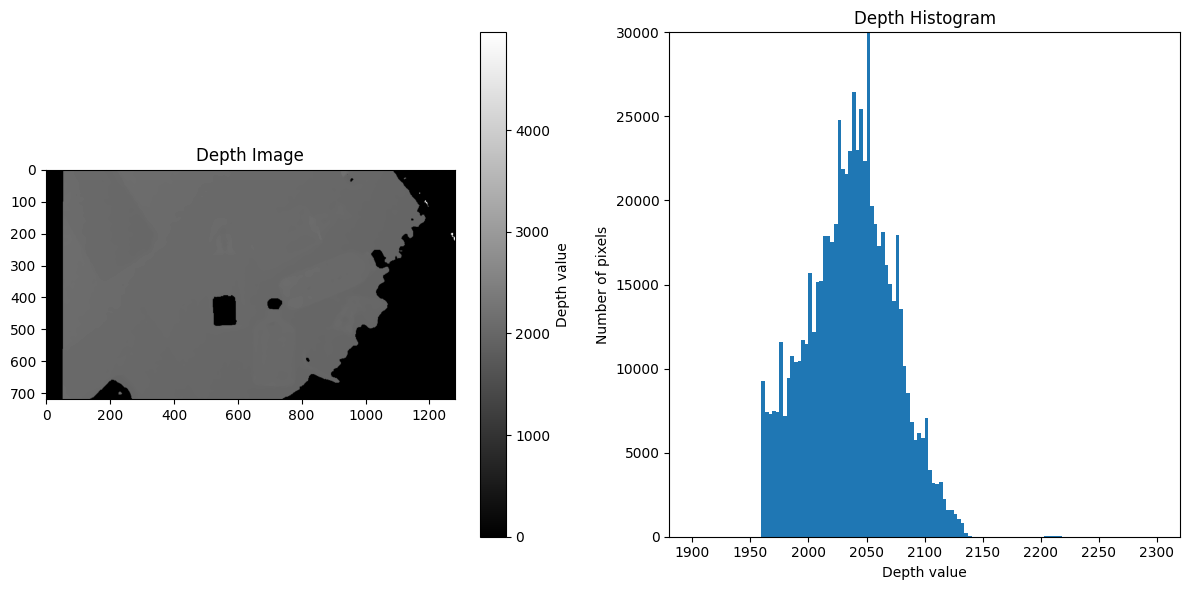

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the depth image
depth_image_path = "depth1.png"
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)
if depth_image is None:
    raise ValueError("Failed to load the depth image.")

# Create a histogram of the depth values
hist, bins = np.histogram(depth_image.ravel(), 128, [1900, 2300])

# Plotting
plt.figure(figsize=(12, 6))

# Display the depth image
plt.subplot(1, 2, 1)
plt.imshow(depth_image, cmap='gray')
plt.colorbar(label='Depth value')
plt.title("Depth Image")

# Display the histogram
plt.subplot(1, 2, 2)
plt.bar(bins[:-1], hist, width=bins[1] - bins[0], align="edge")
plt.xlabel("Depth value")
plt.ylabel("Number of pixels")
plt.ylim(0, 30000)  # Set the y-axis range

plt.title("Depth Histogram")

plt.tight_layout()
plt.show()


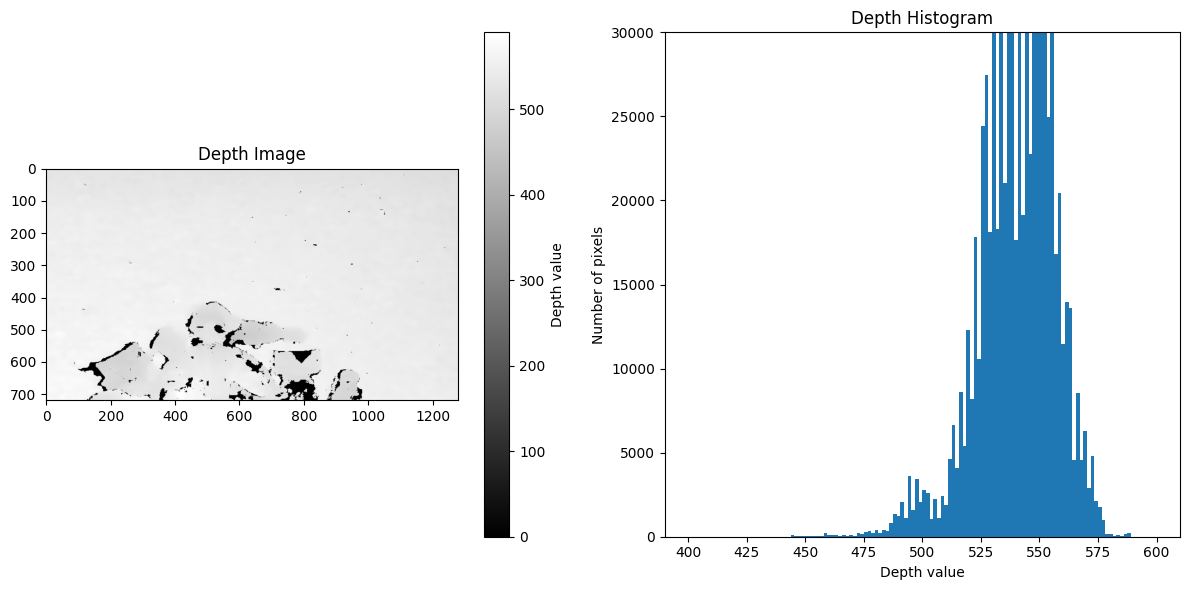

In [20]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the depth image
depth_image_path = "transcg/scene1/0/depth1.png"
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)
if depth_image is None:
    raise ValueError("Failed to load the depth image.")

# Create a histogram of the depth values
hist, bins = np.histogram(depth_image.ravel(), 128, [400, 600])

# Plotting
plt.figure(figsize=(12, 6))

# Display the depth image
plt.subplot(1, 2, 1)
plt.imshow(depth_image, cmap='gray')
plt.colorbar(label='Depth value')
plt.title("Depth Image")

# Display the histogram
plt.subplot(1, 2, 2)
plt.bar(bins[:-1], hist, width=bins[1] - bins[0], align="edge")
plt.xlabel("Depth value")
plt.ylabel("Number of pixels")
plt.ylim(0, 30000)  # Set the y-axis range

plt.title("Depth Histogram")

plt.tight_layout()
plt.show()
